# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.246896e+01     1.368182e+01
 * time: 0.0028328895568847656
     1     6.292567e+01     8.401241e+00
 * time: 0.00842905044555664
     2     5.729928e+01     1.134215e+01
 * time: 0.021646976470947266
     3     4.178852e+01     7.851596e+00
 * time: 0.03948783874511719
     4     3.244084e+01     7.831294e+00
 * time: 0.05771684646606445
     5     3.169965e+01     7.576287e+00
 * time: 0.13650083541870117
     6     1.655559e+01     4.040680e+00
 * time: 0.15200495719909668
     7     1.186634e+01     2.773081e+00
 * time: 0.16478896141052246
     8     1.182838e+01     7.015252e+00
 * time: 0.17541790008544922
     9     9.582954e+00     4.807984e+00
 * time: 0.18812203407287598
    10     7.896210e+00     4.785815e+00
 * time: 0.20520782470703125
    11     7.390010e+00     3.888478e+00
 * time: 0.2229299545288086
    12     6.760210e+00     3.004429e+00
 * time: 0.24064397811889648
    13     6.533500e+00     3.215369e+00
 * tim

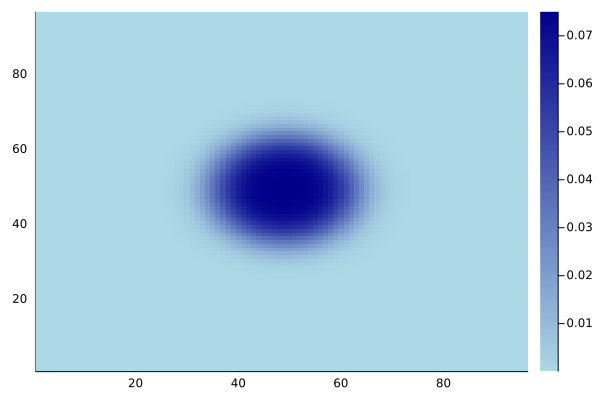

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)

# Parameters
Ecut = 50
n_electrons = 1
β = 5

terms = [Kinetic(2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
display(heatmap(scfres.ρ[:, :, 1, 1], c=:blues))